In [6]:
# Ensure working directory is project root for relative paths
import os
os.chdir('C:/Users/DELL/Desktop/FairFound/FairFound_Data_Freelancer')
print('Current working directory:', os.getcwd())

Current working directory: C:\Users\DELL\Desktop\FairFound\FairFound_Data_Freelancer


User count: 50
Profile count: 50
Review count: 50


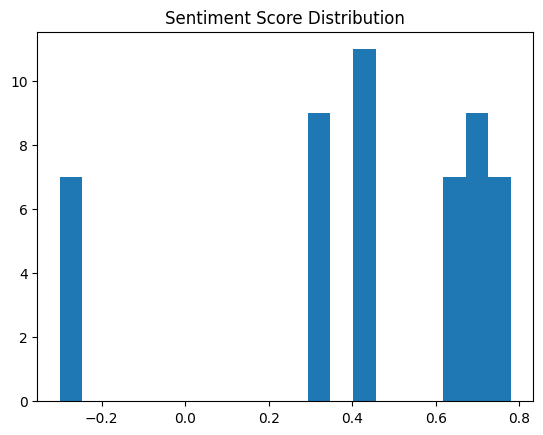

Category tags: categories
communication     50
quality           50
responsiveness    43
documentation     41
scope             41
Name: count, dtype: int64
Sample suggestions: ['Keep doing structured updates and capture testimonials'
 'Share a timeline upfront and add milestones']


In [7]:
import pandas as pd
import json
import matplotlib.pyplot as plt

users = pd.read_csv('data/processed/users.csv')
profiles = pd.read_csv('data/processed/freelancer_profiles.csv')
with open('data/processed/sentiment_reviews_suggested.jsonl') as f:
    reviews = pd.DataFrame([json.loads(line) for line in f])

print('User count:', len(users))
print('Profile count:', len(profiles))
print('Review count:', len(reviews))

plt.hist(reviews['score'], bins=20)
plt.title('Sentiment Score Distribution')
plt.show()

print('Category tags:', reviews['categories'].explode().value_counts().head())
print('Sample suggestions:', reviews['suggestions'].explode().dropna().unique()[:5])

## Data Variety & Realism Checks
- Check for duplicate users, profiles, and reviews
- Visualize skill diversity and hourly rate distribution
- Sample 10 random reviews for realism

Unique users: 50 Total: 50
Unique profiles: 50 Total: 50
Top 10 skills: skills
GraphQL       13
AWS            9
React          9
REST APIs      9
MongoDB        8
Matplotlib     8
Figma          8
MySQL          8
Agile          8
Django         7
Name: count, dtype: int64


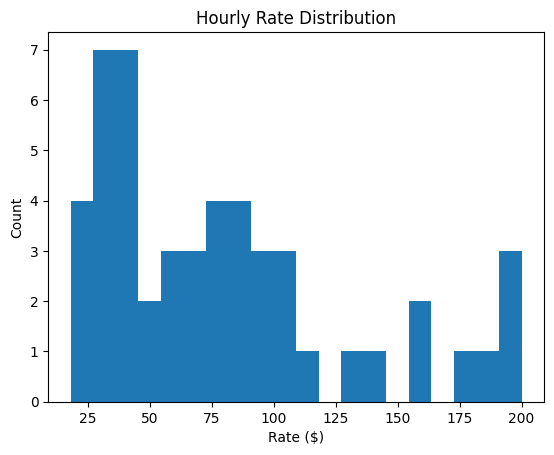

Great communication and timely delivery. Would hire again. | positive | ['communication', 'deadlines', 'documentation', 'quality', 'responsiveness', 'scope'] | ['Keep doing structured updates and capture testimonials']
Outstanding quality and proactive suggestions on scope. | positive | ['communication', 'documentation', 'quality', 'responsiveness', 'scope'] | ['Keep doing structured updates and capture testimonials']
Missed a deadline and final polish needed more attention. | negative | ['communication', 'deadlines', 'documentation', 'quality', 'scope'] | ['Share a timeline upfront and add milestones']
Solid work, clear updates, responsive to feedback. | positive | ['communication', 'documentation', 'quality', 'responsiveness', 'scope'] | ['Keep doing structured updates and capture testimonials']
Communication could be faster but overall fine. | positive | ['communication', 'quality', 'responsiveness'] | ['Keep doing structured updates and capture testimonials']
Work met expectations,

In [8]:
# Check for duplicate users and profiles
users = pd.read_csv('data/processed/users.csv')
profiles = pd.read_csv('data/processed/freelancer_profiles.csv')
print('Unique users:', users['id'].nunique(), 'Total:', len(users))
print('Unique profiles:', profiles['user_id'].nunique(), 'Total:', len(profiles))

# Skill diversity
all_skills = profiles['skills'].str.split(';').explode()
print('Top 10 skills:', all_skills.value_counts().head(10))

# Hourly rate distribution
import matplotlib.pyplot as plt
plt.hist(profiles['hourly_rate'], bins=20)
plt.title('Hourly Rate Distribution')
plt.xlabel('Rate ($)')
plt.ylabel('Count')
plt.show()

# Sample 10 random reviews
import json
with open('data/processed/sentiment_reviews_suggested.jsonl') as f:
    reviews = [json.loads(line) for line in f]
import random
for r in random.sample(reviews, min(10, len(reviews))):
    print(r['text'], '|', r['label'], '|', r['categories'], '|', r['suggestions'])